# Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
1. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
1. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
1. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
1. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
1. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [7]:
def func(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

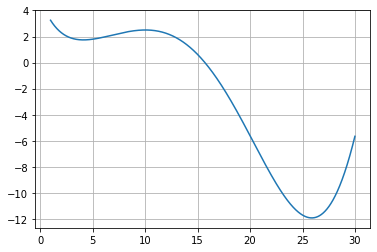

In [8]:
# Создадим область определения и нарисуем функцию
x_min = 1
x_max = 30
dx = 0.01

# Создадим список координат
x_list = np.arange(x_min, x_max, dx)
y_list = [func(x) for x in x_list]

# Нарисуем график
plt.plot(x_list, y_list)

# Покажем окно с нарисованным графиком
plt.grid(True)
plt.show()

In [9]:
from scipy.optimize import differential_evolution as de

In [15]:
bounds = [(1, 30)]
result = de(func, bounds)
print(result.x, result.fun, result.nfev, result.nit)
print("Answer1=", result.fun)

[25.88019315] -11.898894665981318 98 5
Answer1= -11.898894665981318


In [17]:
answer = '{}'.format(result.fun)
with open('3.2hw1.txt', 'w') as f:
  f.write(answer)
answer

'-11.898894665981318'

При перезапуске дифференциальной эволюции количество итераций изменится, но в данном примере, скорее всего, оно всегда будет сравнимо с количеством итераций BFGS. Однако в дифференциальной эволюции итерация требует гораздо больше работы, чем BFGS. Например, вы можете обратить внимание на количество вычислений значения функции (nfev) и увидеть, что в BFGS оно гораздо меньше. Кроме того, время выполнения дифференциальной эволюции очень быстро увеличивается по мере увеличения числа аргументов функции.